- 都道府県別のキャンペーンあたりの平均応募数 - クオーター毎に

- this one can actually be done on Redash...

In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
import japanmap as jm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
font = {"family":"IPAexGothic"}
plt.rc('font', **font)

# data: all offers <a name="all_offers"></a>

- 20201006: update to include data only in Q3 

In [6]:
# select offers.id as offer_id, offers.campaign_id, offers.user_influencer_id, 
# date_format(offers.created_at, '%Y-%m-%d %H:%i:%s') as created_at,
# campaigns.pref, campaigns.genre_id
# from offers
# left join campaigns
# on offers.campaign_id = campaigns.id
# where (pref is not null) and (offers.created_at >= '2020-07-01') and (offers.created_at < '2020-10-01')
# and (campaigns.project_type = 10)

In [7]:
# df_all_offers = pd.read_csv('1087468_2020_10_06_all_offers.csv')
df_all_offers = pd.read_csv('New_Query_2020_10_23_offers_3q.csv')

In [8]:
df_all_offers['created_at'] = pd.to_datetime(df_all_offers['created_at'])

In [9]:
df_all_offers.head(2)

,offer_id,campaign_id,user_influencer_id,created_at,pref,genre_id
0,172049,158,10888,2020-07-02 14:53:48,13,1.0
1,176192,158,10350,2020-07-06 21:39:01,13,1.0


In [10]:
len(df_all_offers)

38372

In [11]:
max(df_all_offers.created_at)

Timestamp('2020-09-30 23:56:23')

In [12]:
min(df_all_offers.created_at)

Timestamp('2020-07-01 00:03:08')

### pref names, genre_id maps

In [13]:
map_pref = {
1: '1: 北海道',
2: '2: 青森県',
3: '3: 岩手県',
4: '4: 宮城県',
5: '5: 秋田県',
6: '6: 山形県',
7: '7: 福島県',
8: '8: 茨城県',
9: '9: 栃木県',
10: '10: 群馬県',
11: '11: 埼玉県',
12: '12: 千葉県',
13: '13: 東京都',
14: '14: 神奈川県',
15: '15: 新潟県',
16: '16: 富山県',
17: '17: 石川県',
18: '18: 福井県',
19: '19: 山梨県',
20: '20: 長野県',
21: '21: 岐阜県',
22: '22: 静岡県',
23: '23: 愛知県',
24: '24: 三重県',
25: '25: 滋賀県',
26: '26: 京都府',
27: '27: 大阪府',
28: '28: 兵庫県',
29: '29: 奈良県',
30: '30: 和歌山県',
31: '31: 鳥取県',
32: '32: 島根県',
33: '33: 岡山県',
34: '34: 広島県',
35: '35: 山口県',
36: '36: 徳島県',
37: '37: 香川県',
38: '38: 愛媛県',
39: '39: 高知県',
40: '40: 福岡県',
41: '41: 佐賀県',
42: '42: 長崎県',
43: '43: 熊本県',
44: '44: 大分県',
45: '45: 宮崎県',
46: '46: 鹿児島',
47: '47: 沖縄県'
}

In [57]:
map_genre = { 1: '1: グルメ',
            2: '2: トラベル',
            3: '3: ビューティー',
            4: '4: レジャー'}

In [62]:
map_genre2 = { 1: 'gourmet',
            2: 'travel',
            3: 'beauty',
            4: 'leisure'}

In [14]:
df_all_offers.head(2)

,offer_id,campaign_id,user_influencer_id,created_at,pref,genre_id
0,172049,158,10888,2020-07-02 14:53:48,13,1.0
1,176192,158,10350,2020-07-06 21:39:01,13,1.0


# Functions to automate getting df and plotting 

In [63]:
def get_df_offers_pref(genre):
    
    df_genre = df_all_offers[df_all_offers.genre_id == genre]
    
    df_genre_pref = (df_genre.groupby(['pref','campaign_id'])['offer_id'].size()
                            .reset_index()
                            .rename(columns = {'offer_id':'offer_count'})
                    )
    
    column_name = 'average_offer_count_'+ map_genre2[genre]
    df_genre_pref_ave_offer = (df_genre_pref.groupby('pref')['offer_count'].mean()
                               .reset_index()
                               .rename(columns = {'offer_count':column_name})
                              )
    
#     df_genre_pref_ave_offer['pref_kanji'] = df_genre_pref_ave_offer['pref'].map(map_pref)

    df_genre_pref_ave_offer.set_index('pref', inplace = True)
    
    return (df_genre_pref_ave_offer)
    

In [64]:
get_df_offers_pref(1).head()

,average_offer_count_gourmet
pref,
1,10.000000
4,4.000000
9,2.500000
10,10.000000
11,19.571429


In [38]:
# def plot_offers_pref(genre):
    
#     df_offers = get_df_offers_pref(genre)
    
#     ind = np.arange(len(df_offers))
#     width = 0.4

#     fig, ax1 = plt.subplots(figsize=(18, 6))

#     ax1.bar(ind, 
#             df_offers['average_offer_count'],
#             width = width,
#             align='edge',
#            label = 'モニター型1CPあたりの平均応募数', color = 'lightsalmon', alpha = 0.8)

# #     ax1.bar(ind+width, 
# #             df_offers['average_offer_count_paid'],
# #             width = width,
# #             align='edge',
# #            label = '投稿報酬型1CPあたりの平均応募数', color = 'gold', alpha = 0.8)

#     ax1.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 15)

#     plt.xlim(-0.5,len(df_offers))
#     ax1.set_xticks(ind + width)
#     ax1.set_xticklabels(df_offers['pref_kanji'], rotation = 90,
#                           ha = 'center', fontsize = 15)

#     plt.yticks(fontsize = 14)
#     ax1.set_ylabel('1CPあたりの平均オファー数', fontsize = 18, labelpad = 5)

#     return()

In [47]:
# plot_offers_pref(1)

# plotting

In [65]:
df_gourmet = get_df_offers_pref(1)
df_beauty = get_df_offers_pref(3)
df_leisure = get_df_offers_pref(4)

# to make sure all 3 graphs have same x-axis and therefore can share the same x-axis
df_offers_per_campaign_by_pref_free_average = pd.concat([df_gourmet,
                                                         df_beauty,
                                                         df_leisure],
                                                         axis=1, sort=False)

df_offers_per_campaign_by_pref_free_average['pref_kanji'] = (df_offers_per_campaign_by_pref_free_average.index
                                                            .map(map_pref))

In [66]:
df_offers_per_campaign_by_pref_free_average.head()

,average_offer_count_gourmet,average_offer_count_beauty,average_offer_count_leisure,pref_kanji
pref,,,,
1,10.0,4.800000,1.0,1: 北海道
4,4.0,5.333333,3.0,4: 宮城県
8,NaN,3.000000,NaN,8: 茨城県
9,2.5,3.500000,NaN,9: 栃木県
10,10.0,5.500000,NaN,10: 群馬県


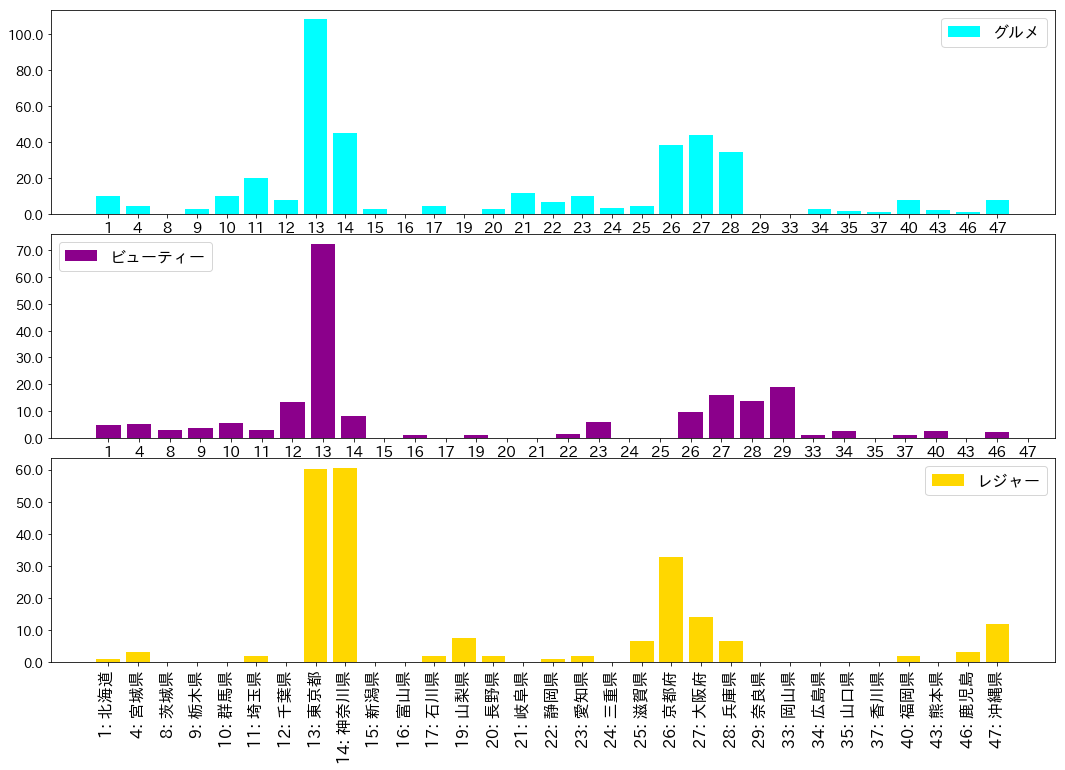

In [67]:
fig, axs = plt.subplots(3, figsize=(18,12))
plt.subplots_adjust(hspace = 0.1)
axs[0].bar(df_offers_per_campaign_by_pref_free_average['pref_kanji'], 
        df_offers_per_campaign_by_pref_free_average['average_offer_count_gourmet'], 
       label = 'グルメ', color = 'cyan')
axs[0].legend(fontsize = 16)
axs[0].set_yticklabels(axs[0].get_yticks(), fontsize = 13)
axs[0].set_xticklabels(df_offers_per_campaign_by_pref_free_average.index,
                      ha = 'center', fontsize = 15)

axs[1].bar(df_offers_per_campaign_by_pref_free_average['pref_kanji'], 
        df_offers_per_campaign_by_pref_free_average['average_offer_count_beauty'], 
       label = 'ビューティー', color = 'darkmagenta')
axs[1].legend(fontsize = 16)
axs[1].set_yticklabels(axs[1].get_yticks(), fontsize = 13)
axs[1].set_xticklabels(df_offers_per_campaign_by_pref_free_average.index, 
                       ha = 'center', fontsize = 15)

axs[2].bar(df_offers_per_campaign_by_pref_free_average['pref_kanji'], 
        df_offers_per_campaign_by_pref_free_average['average_offer_count_leisure'], 
       label = 'レジャー', color = 'gold')
axs[2].legend(fontsize = 16)
axs[2].set_yticklabels(axs[2].get_yticks(), fontsize = 13)
axs[2].set_xticklabels(df_offers_per_campaign_by_pref_free_average['pref_kanji'], rotation = 90,
                      ha = 'center', fontsize = 16)

plt.show()

# genre 1 : グルメ

# genre 3: ビューティー